## ML REAL ESTATE PREDICTOR MODEL FOR NEO MAK CONSTRUCTIONS BY MOHAMMED ASIM FURQAAN.

## Import all necessary files

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

## Import data 

In [2]:
housing = pd.read_csv("housing_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Title Description

    1. CRIM -    per capita crime rate by town. 
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town.
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    5. NOX       nitric oxides concentration (parts per 10 million).
    6. RM        average number of rooms per dwelling.
    7. AGE       proportion of owner-occupied units built prior to 1940.
    8. DIS       weighted distances to five Boston employment centres.
    9. RAD       index of accessibility to radial highways.
    10. TAX      full-value property-tax rate per 10,000 dollars.
    11. PTRATIO  pupil-teacher ratio by town.
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    13. LSTAT    % lower status of the population.
    14. MEDV     Median value of owner-occupied homes in 1000's dollars.

## Understanding the data

In [4]:
housing.info() #There is some missing data in 'RM', also data size is very small.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing['AGE'].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

In [7]:
housing.describe() #We have some missing values in "RM"

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286934,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704435,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

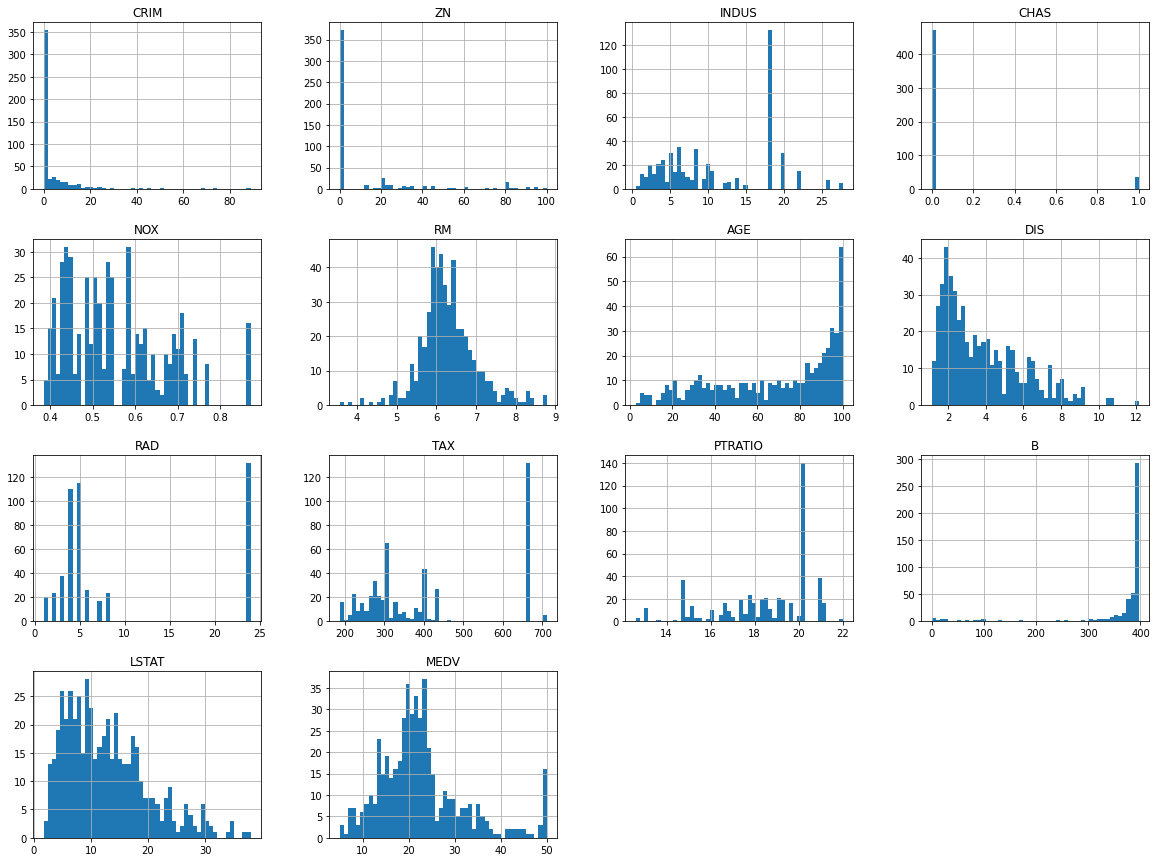

In [9]:
housing.hist(bins= 50, figsize= (20,15))

## Train-Test-Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)})\n")

Rows in train set: 404
Rows in test set: 102)



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()  #The CHAS values are equally divided by stratified sampling.

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()  #The CHAS values are equally divided by stratified sampling.

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
housing = strat_train_set.copy()

## Filling missing values in the data set

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [16]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01, 2.11500e+01])

In [17]:
X =imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281389,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712014,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Trying Attribute Combinations

In [18]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [19]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679848
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528657
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

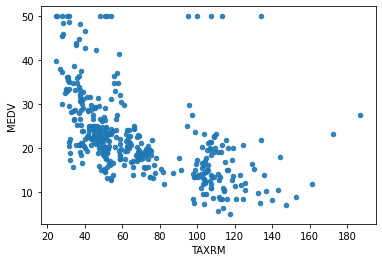

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.9)

## Looking for correlations

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.679848
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528657
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

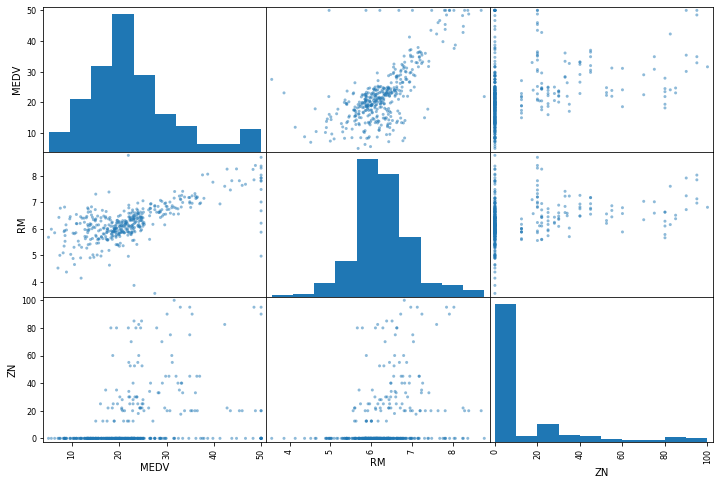

In [25]:
attributes = ["MEDV", "RM", "ZN"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

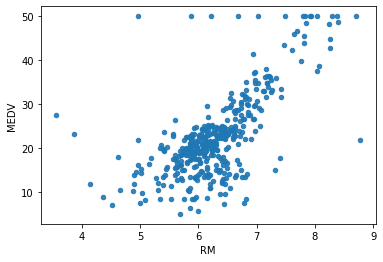

In [26]:
housing.plot(kind = "scatter", x="RM", y="MEDV", alpha= 0.9)

## Seperating Labels and Data

In [27]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Creating a pipleline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                      ('std_scaller', StandardScaler())])
housing_num_tr = my_pipeline.fit_transform(housing)

In [30]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [31]:
housing_num_tr.shape

(404, 13)

# Selecting a Machine Learning Model for NEO MAK Constructions

## Trying with LinearRegression Model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [33]:
some_data = housing.iloc[0:5]
some_labels = housing_labels.iloc[0:5]

In [34]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.95463105, 27.21482311, 20.58202318, 25.02520659, 23.74927014])

In [35]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating LinearRegression model for RMSE

In [36]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [37]:
lin_rmse

4.8299687198382095

In [38]:
#There is a heavy error and hence LinearRegression wont be used for this model. Here RMSE error is around 4.8

In [39]:
lin_mse

23.328597834615554

## Trying with DecisionTreeRegressor Model

In [40]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [41]:
some_data = housing.iloc[0:5]
some_labels = housing_labels.iloc[0:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating DecisionTreeRegression model for RMSE

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

0.0

In [46]:
# 0 error indicates overfitting of data

### Using better evaluation techniques (Cross Validation) to avoid overfitting

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.0221642 , 5.36610864, 5.31238773, 3.88568354, 3.97262508,
       3.0235327 , 4.8843884 , 3.95161359, 3.36544945, 4.69140171])

In [48]:
rmse_scores.mean()

4.247535504648997

In [49]:
# Here by using DecisionTreeRegression we are getting an error around 4.31. So using this model is a better option.

## Trying with RandomForestRegressor Model

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [51]:
some_data = housing.iloc[0:5]
some_labels = housing_labels.iloc[0:5]

In [52]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.291, 25.53 , 16.719, 23.425, 23.689])

In [53]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating RandomForestRegressor model for RMSE

In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
random_mse = mean_squared_error(housing_labels,housing_predictions)
random_rmse = np.sqrt(random_mse)

In [55]:
random_rmse

1.2037127259993021

In [56]:
# Here by using RandomForestRegressor we are getting an error of around 1.8 which seems the least error and hence a perfect model.

## Final Outputs from all models implimented:

 1) LinearRegression: Here, RMSE: 4.8299687198382095. (High Error so we wont chose this model)
  
 2) DecisionTreeRegression: Here, RMSE: 4.319885498564547. (Comparatively small error)
 
 3) RandomForestRegressor: Here, RMSE: 1.1887567565476223. (The least error is found using this)

## Saving the model

In [57]:
from joblib import dump,load
dump(model, 'NEOMAK.joblib')

['NEOMAK.joblib']

## Testing the model on Test Data

In [58]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()

In [59]:
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)

In [60]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

3.0127094834007053

In [62]:
# This shows that there is an error of only 2.9

In [63]:
print(final_predictions,list(y_test))

[24.587 11.395 25.553 22.091 18.436 14.852 20.095 14.693 32.096 41.056
 19.237 11.853 24.231 27.512 19.485 10.622 31.729 14.288 23.799 18.791
 20.152 17.94  19.905 22.048 18.174 31.42  16.16  33.068  8.8   33.612
 23.971 21.598 22.994 11.069 20.871 11.239 42.376 24.313 23.397 41.794
 24.105 29.21  20.304 20.859 18.953 33.223 45.505 20.227 20.512 21.727
 21.26  14.773 21.578 15.206 24.734 32.574 42.641 29.53  19.431 21.76
 46.293  9.522 19.087 25.71  14.747 32.967 19.928 18.14  19.222 34.163
 26.449 22.899 21.485 22.354 35.092 13.215 15.848 19.833 20.835 21.567
 22.794 21.3   14.223 22.844 20.559 21.006 13.902 21.204 21.915 23.237
 18.785 27.139  7.126 27.024 19.262 29.684 20.182 31.716 14.397 26.785
 21.563 20.629] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

## Taking out prepared data for NEOMAK to use for direct usage

In [64]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2438205 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [65]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.49725126, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])

In [66]:
prepared_data[4]

array([-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
        0.04304598, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
        0.52982668,  0.45343469, -0.91902752])